<a href="https://colab.research.google.com/github/sayanghorui/samplecode/blob/master/Practice_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_images.shape
#train_images[3][15]
train_images.dtype

dtype('uint8')

In [0]:
my_slice = train_images[10:100, 3:-13, 7:-7]
my_slice[0][5]

array([  0,   0,   0,   0,   0, 207, 254, 210, 254, 254, 254,  34,   0,
         0], dtype=uint8)

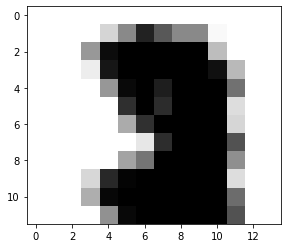

In [0]:
plt.imshow(train_images[10],cmap = plt.cm.binary)
plt.imshow(my_slice[0],cmap = plt.cm.binary)
plt.show()

In [0]:
len(train_labels)

60000

In [0]:
train_labels[3]

1

In [0]:
test_images.shape
len(test_labels)
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
from keras import models, layers

In [0]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [0]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
#train_images[0]
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [0]:
network.fit(train_images, train_labels, epochs=6, batch_size=128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/6





60000/60000 [==============================] - 7s 110us/step - loss: 0.2551 - acc: 0.9266
Epoch 2/6
60000/60000 [==============================] - 2s 36us/step - loss: 0.1036 - acc: 0.9697
Epoch 3/6
60000/60000 [==============================] - 2s 35us/step - loss: 0.0680 - acc: 0.9796
Epoch 4/6
60000/60000 [==============================] - 2s 35us/step - loss: 0.0496 - acc: 0.9850
Epoch 5/6
60000/60000 [==============================] - 2s 36us/step - loss: 0.0372 - acc: 0.9889
Epoch 6/6
60000/60000 [==============================] - 2s 37us/step - loss: 0.0280 - acc: 0.9914


In [0]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 52us/step
test_acc: 0.9794
